### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('data.csv')

### Exploratory data analysis

In [3]:
df.head()

,crim,zin,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zin      506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# checking for null values
df.isnull().sum()

crim       0
zin        0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.columns

Index(['crim', 'zin', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

### Plotting correlation heatmap

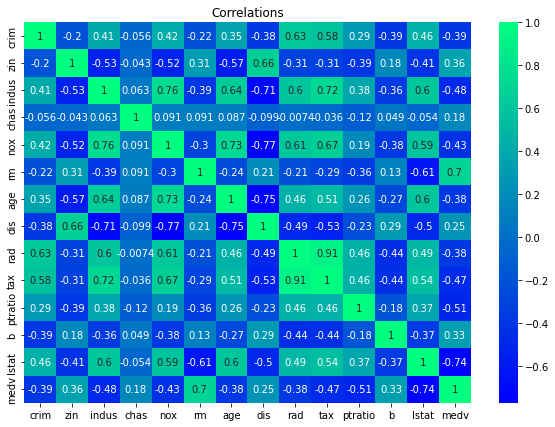

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='winter')
plt.title('Correlations')
plt.show()

### Separating dependant and independant features

In [9]:
X=df.drop('medv',axis=1)
y=df.medv

### Performing train-test split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


### Fitting linear regression

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
from sklearn.metrics import mean_squared_error
print("Mean squared error",mean_squared_error(y_test,y_hat))
print("Training accuracy",lr.score(X_train,y_train))
print("Testing accuracy",lr.score(X_test,y_test))

Mean squared error 27.406836284337277
Training accuracy 0.7508856358979672
Testing accuracy 0.6262727067493543


### Fitting random forest regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(X_train,y_train)
y_hat2=rr.predict(X_test)
print("Mean squared error",mean_squared_error(y_test,y_hat2))
print("Training accuracy",rr.score(X_train,y_train))
print("Testing accuracy",rr.score(X_test,y_test))

Mean squared error 10.576304627450984
Training accuracy 0.9778926147167111
Testing accuracy 0.8557785488261396


### Fitting decision tree regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
y_hat3=dr.predict(X_test)
print("Mean squared error",mean_squared_error(y_test,y_hat3))
print("Training accuracy",dr.score(X_train,y_train))
print("Testing accuracy",dr.score(X_test,y_test))

Mean squared error 20.27872549019608
Training accuracy 1.0
Testing accuracy 0.7234736213477142


### Fitting xgboost regressor

In [15]:
from xgboost import XGBRegressor
xr=XGBRegressor()
xr.fit(X_train,y_train)
y_hat4=xr.predict(X_test)
print("Mean squared error",mean_squared_error(y_test,y_hat4))
print("Training accuracy",xr.score(X_train,y_train))
print("Testing accuracy",xr.score(X_test,y_test))

Mean squared error 8.866644218523831
Training accuracy 0.9999953622164942
Testing accuracy 0.8790919568524169


### We are going to use Xgboost regressor as it gives good accuracy